# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

**Connecting the drive**

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [2]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [3]:
#setting option to display all th ecolumns available
pd.set_option('display.max_columns', None)

**Loading the dataset**

In [4]:
#loading the given dataset
data = pd.read_excel('/content/drive/MyDrive/classification model/default of credit card clients.xls')
#first 5 rows of data
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


**we can see that the columns are wrongly named and the actual columns are in the first row of the dataset. So we have to raeplace the fisrt row as the feature names.**

In [5]:
#renaming the columns in the dataset
data = pd.read_excel('/content/drive/MyDrive/classification model/default of credit card clients.xls', 
                     names=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'])

**named the features and replaced it**

In [6]:
#dropping the first row as it contains the columns name
data.drop(data.index[0:1], inplace=True)

**The first should be dropped as it contains the column names**

In [7]:
#renaming the feature in the dataset which was wrongly named
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

**As the PAY_0 was wrongly named and is replaced as PAY_1**

In [8]:
#printing the dataframe after all the changes
print('Default of Credit Card Clients:')
data.head()

Default of Credit Card Clients:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#Actual columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
#shape and of the dataset
data.shape

(30000, 25)

In [11]:
#the number of unique values that each column contains
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

# **Data Cleaning**

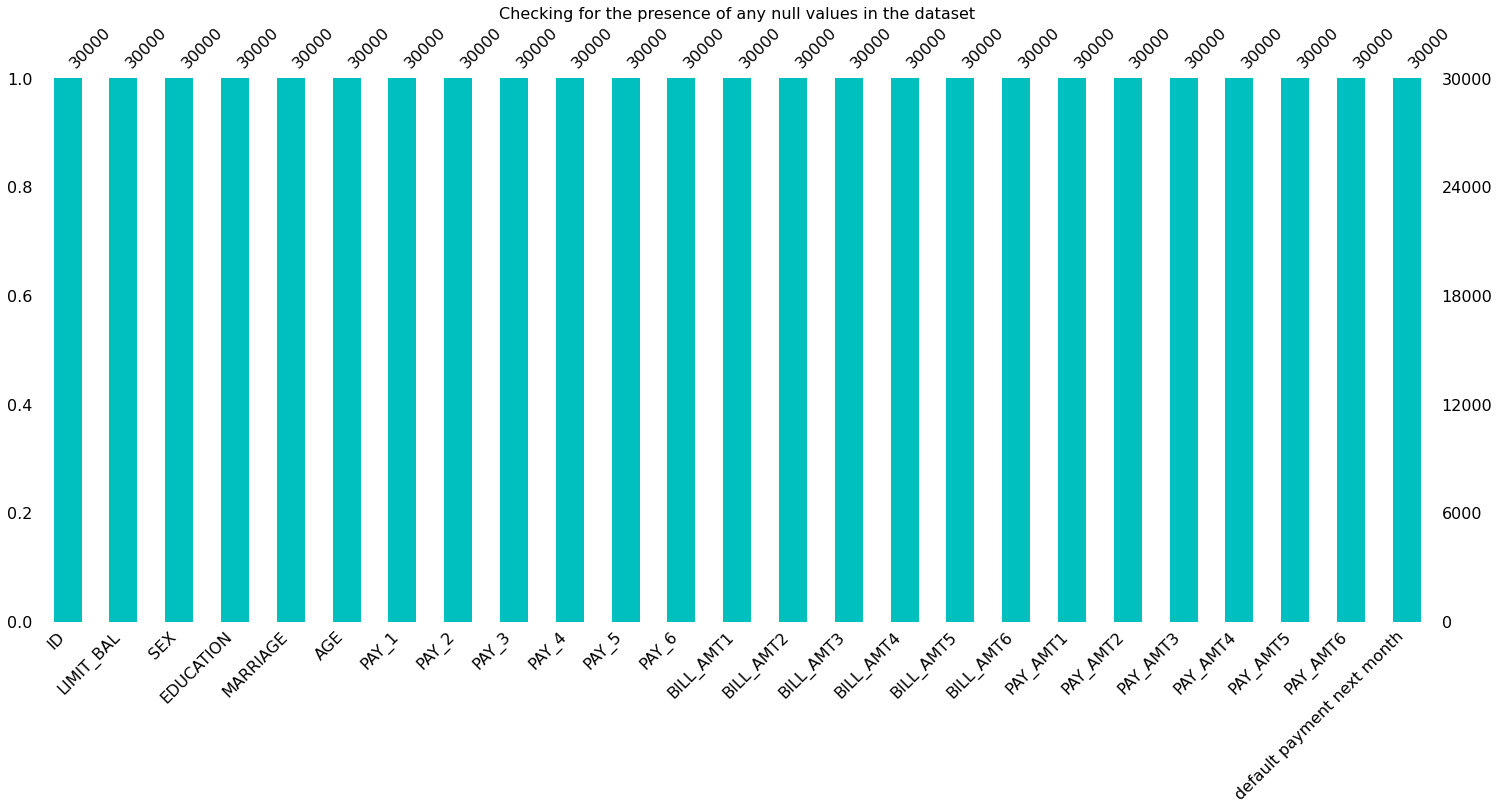

In [12]:
#checking for nan values
msno.bar(data, color='c')
plt.title('Checking for the presence of any null values in the dataset', size=16)
plt.show()

* The above barplot shows that there are no null values present in the dataset

In [13]:
#showin the datatype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

# **Exploratory Data Analysis**

**Analysis of Limit Balance**

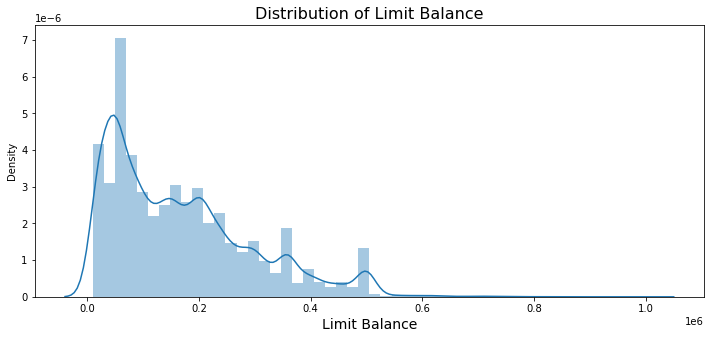

In [14]:
#plotting the desity of the linit balance feature
plt.figure(figsize=(12,5))
sns.distplot(data['LIMIT_BAL'])
plt.title('Distribution of Limit Balance', size=16)
plt.xlabel('Limit Balance', size=14)
plt.show()

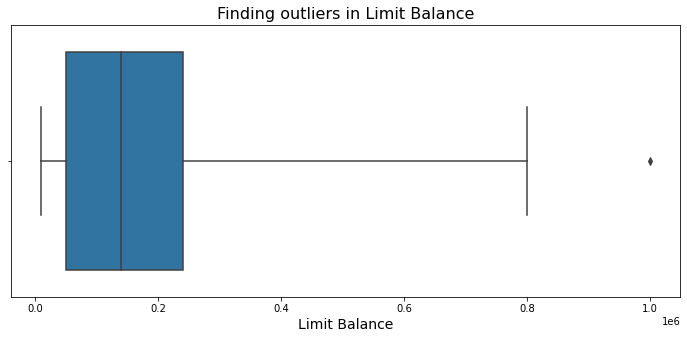

In [15]:
#checking for outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='LIMIT_BAL', whis=3)
plt.title('Finding outliers in Limit Balance', size=16)
plt.xlabel('Limit Balance', size=14)
plt.show()

**Top Limit Balances**

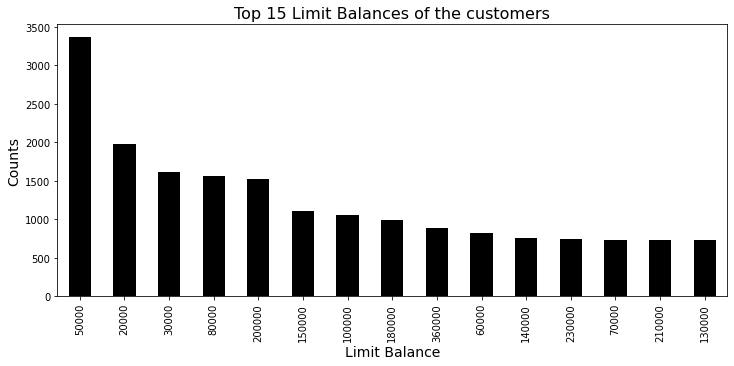

In [16]:
#analysing the limit balance feature
limit = data['LIMIT_BAL'].value_counts().sort_values(ascending=False)

#plotting the top 15 limit balances
top_limit = limit.head(15)
top_limit.plot(kind='bar', figsize=(12, 5), color='k')
plt.title('Top 15 Limit Balances of the customers', size=16)
plt.xlabel('Limit Balance', size=14)
plt.ylabel('Counts', size=14)
plt.show()

**Least Limit Balances**

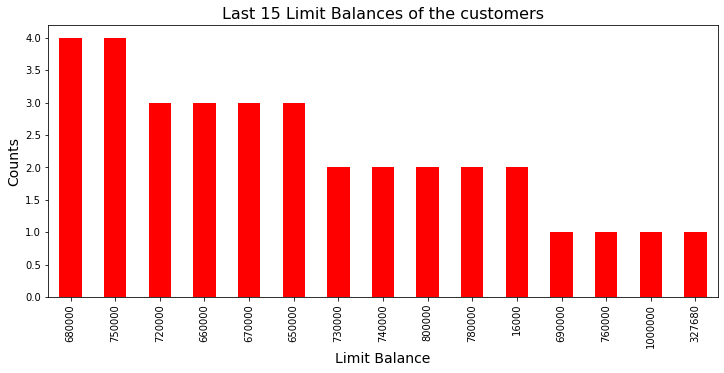

In [17]:
#visualization of last 15 limit balances
least_limit = limit.tail(15)
least_limit.plot(kind='bar', figsize=(12, 5), color='r')
plt.title('Last 15 Limit Balances of the customers', size=16)
plt.xlabel('Limit Balance', size=14)
plt.ylabel('Counts', size=14)
plt.show()

In [18]:
#selected few columns foe analysis
features = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']

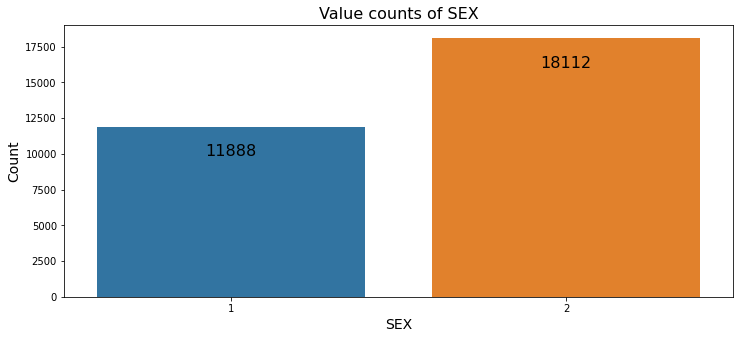

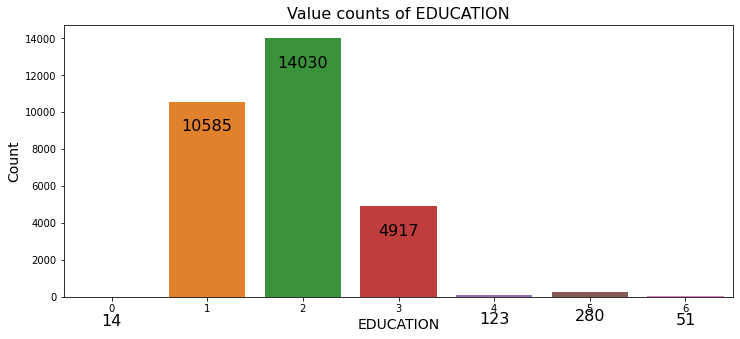

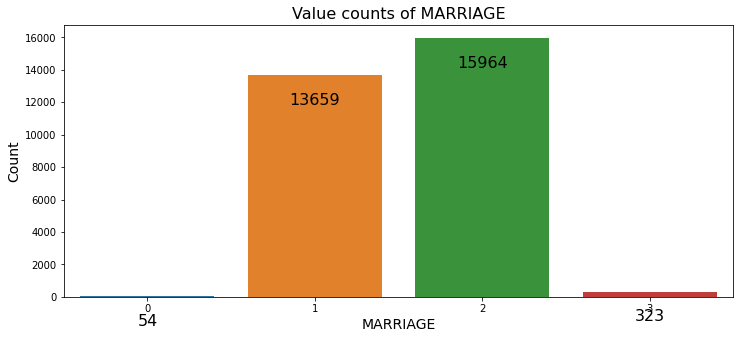

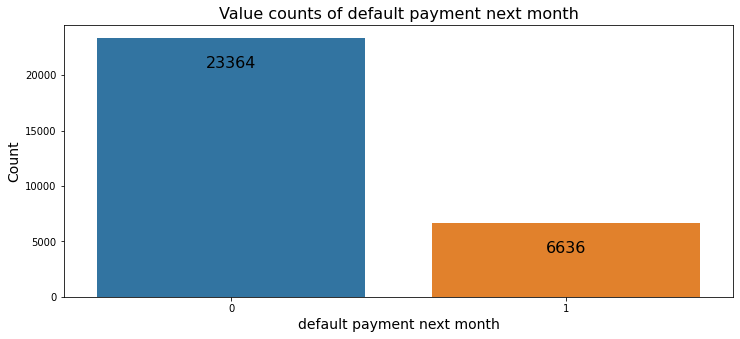

In [19]:
#analysisng the categorical features
for col in features:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    #plotting their value counts
    ch = sns.countplot(data[col], ax=ax)
    plt.title(f'Value counts of {col}', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), va = 'top', ha = 'center', size=16)
    plt.show()

* There dataset contains more than 50 female customers.

* Most of the Customers are from University level of education.

* It is assumed that 0 is for divorced customers. Unmarried i.e., sinle customers are more in number.


**Value Count of Age**

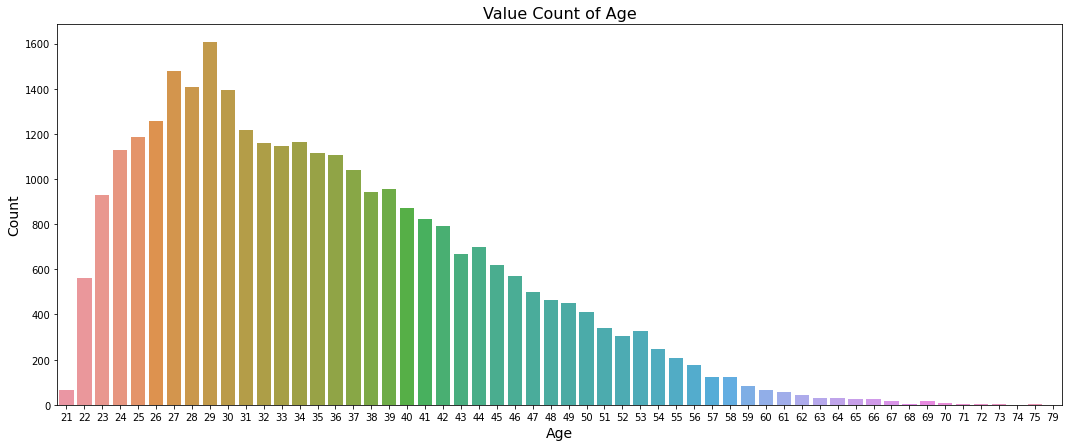

In [20]:
#value counts of age feature
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='AGE')
plt.title('Value Count of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

* The dataset contains the customers from 21 to 79 age group. Customers of age group of 29 are more


**Age Vs Default Payment Next Month**

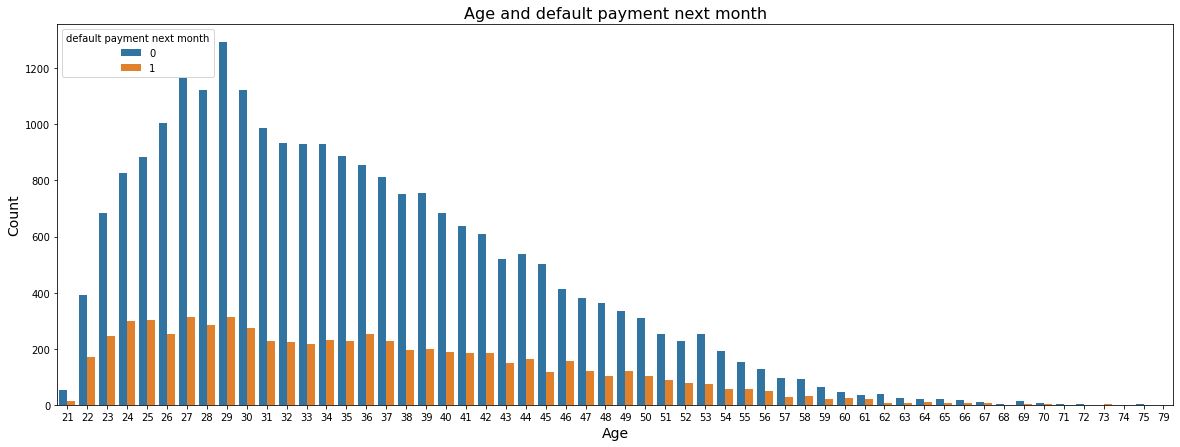

In [21]:
#visualization of defaulters on the basis of age
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='AGE', hue='default payment next month')
plt.title('Age and default payment next month', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Education Vs Default Payment Next Month**

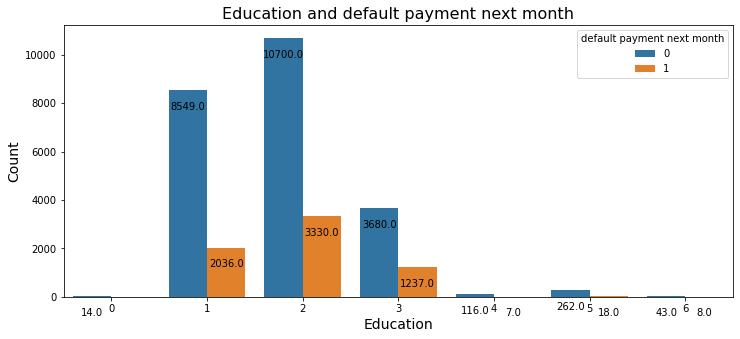

In [22]:
#value counts of defaulters on the basis of education
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='EDUCATION')
#having counts on the specified bar
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.title('Education and default payment next month', size=16)
plt.xlabel('Education', size=14)
plt.ylabel('Count', size=14)
plt.show()

* The university level educated people are mostly paying their dues on time and some among them are making delay in payments.

**Marriage Vs Default Payment Next Month**

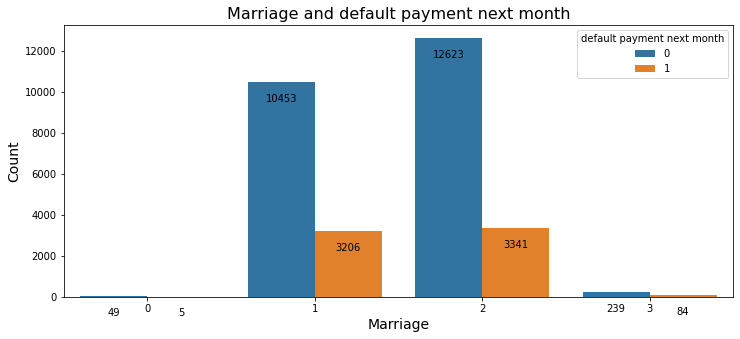

In [23]:
#plotting the defaulters on the basis of marriage
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='MARRIAGE')
plt.title('Marriage and default payment next month', size=16)
plt.xlabel('Marriage', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=10)
plt.show()

**Sex Vs Default Payment Next Month**

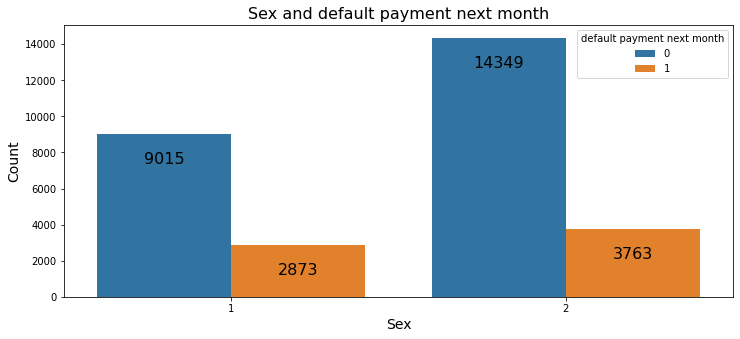

In [24]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=data, hue='default payment next month', x='SEX')
plt.title('Sex and default payment next month', size=16)
plt.xlabel('Sex', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', ha='center', size=16)
plt.show()

**Age Vs Default Payment Next Month**

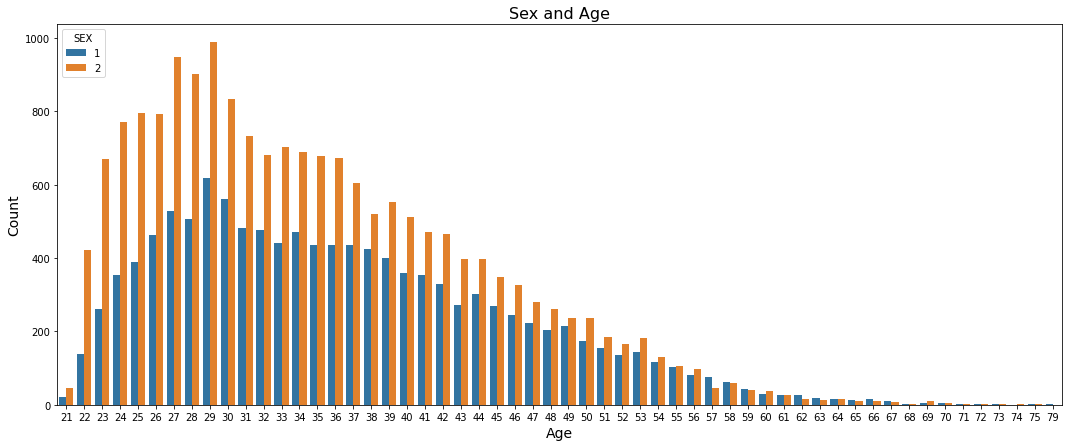

In [25]:
age = data.groupby(['AGE', 'SEX']).agg({'SEX':sum})

plt.figure(figsize=(18,7))
sns.countplot(data=data, x='AGE', hue='SEX')
plt.title('Sex and Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

In both male and female most of the customers are from the age group of 29.

**Pay Vs Default payment for next month**

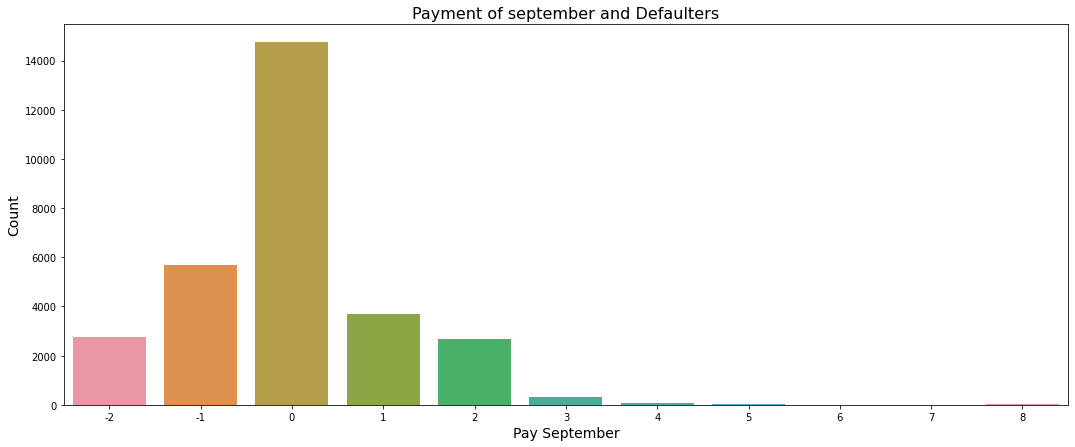

In [26]:
#list of payment features in the datset
pay = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#Payment of september and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_1')
plt.title('Payment of september and Defaulters', size=16)
plt.xlabel('Pay September', size=14)
plt.ylabel('Count', size=14)
plt.show()

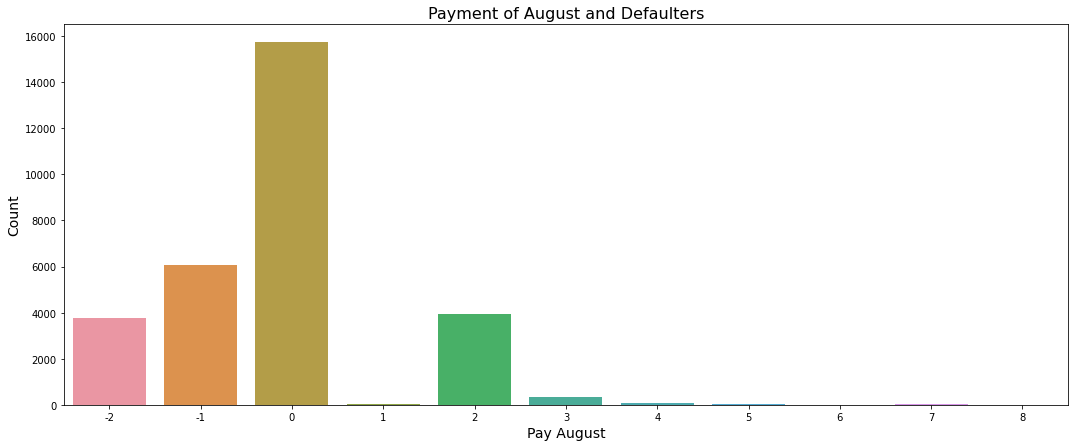

In [27]:
#Payment of Augudt and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_2')
plt.title('Payment of August and Defaulters', size=16)
plt.xlabel('Pay August', size=14)
plt.ylabel('Count', size=14)
plt.show()

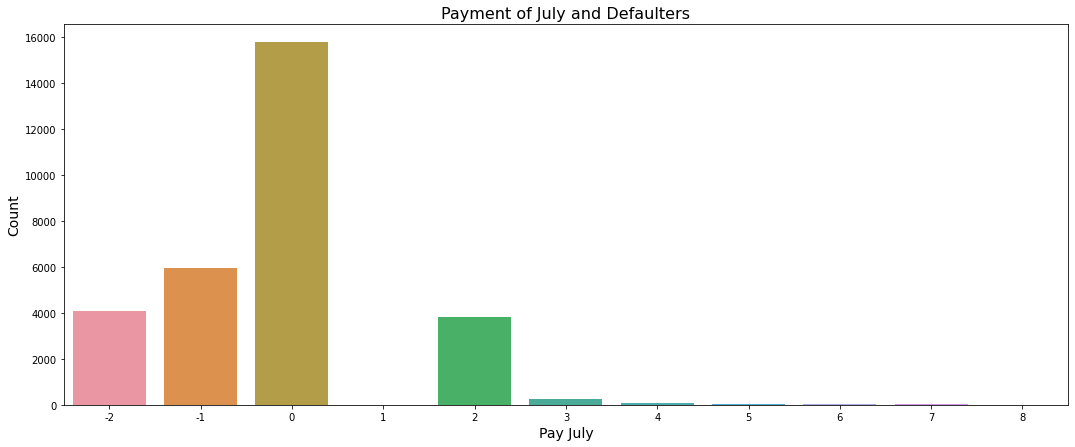

In [28]:
#Payment of july and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_3')
plt.title('Payment of July and Defaulters', size=16)
plt.xlabel('Pay July', size=14)
plt.ylabel('Count', size=14)
plt.show()

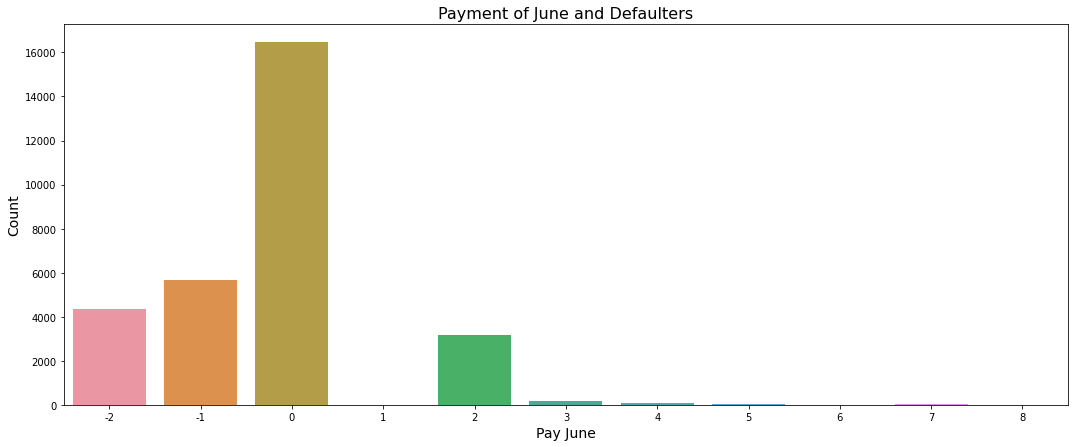

In [29]:
#Payment of May and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_4')
plt.title('Payment of June and Defaulters', size=16)
plt.xlabel('Pay June', size=14)
plt.ylabel('Count', size=14)
plt.show()

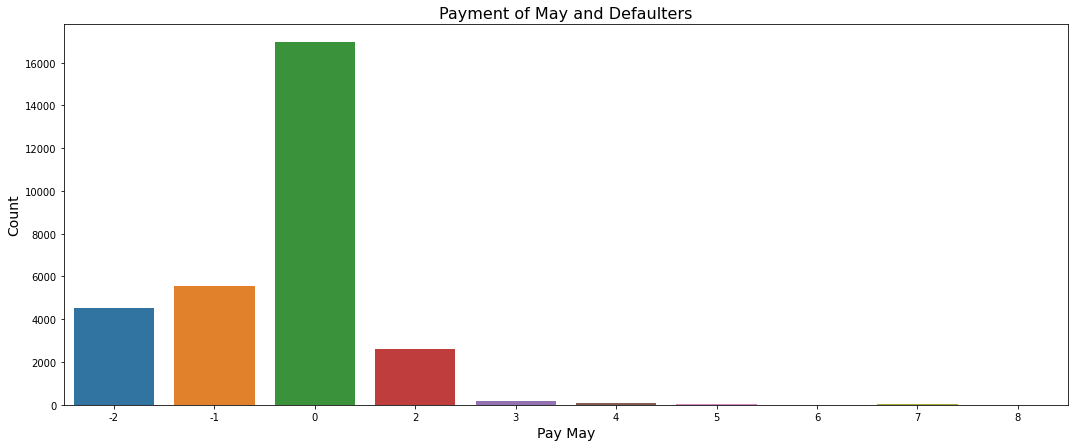

In [30]:
#Payment of May and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_5')
plt.title('Payment of May and Defaulters', size=16)
plt.xlabel('Pay May', size=14)
plt.ylabel('Count', size=14)
plt.show()

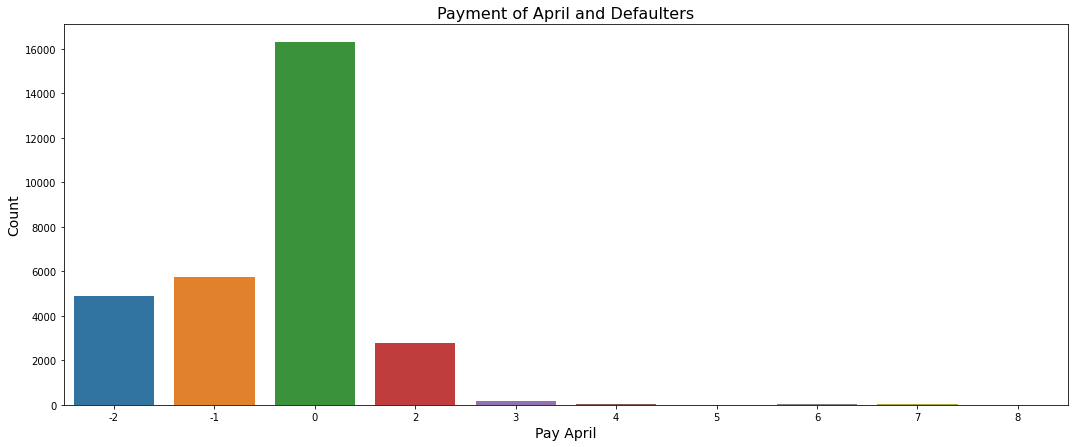

In [31]:
#Payment of April and Defaulters
plt.figure(figsize=(18,7))
sns.countplot(data=data, x='PAY_6')
plt.title('Payment of April and Defaulters', size=16)
plt.xlabel('Pay April', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Checking for outliers**

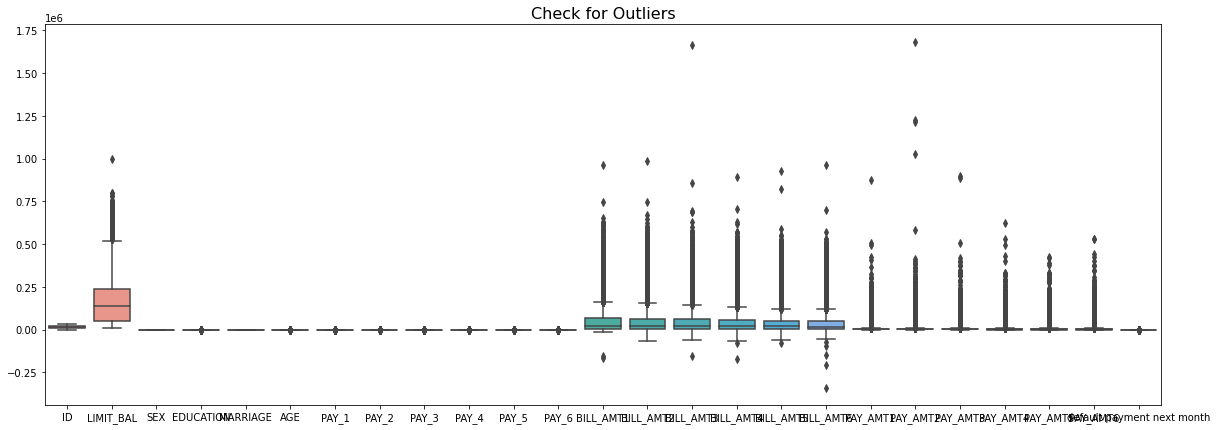

In [32]:
#plotting the outlies in the dataset
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)
plt.title('Check for Outliers', size=16)
plt.show()

**Visualization of Bill Amount**

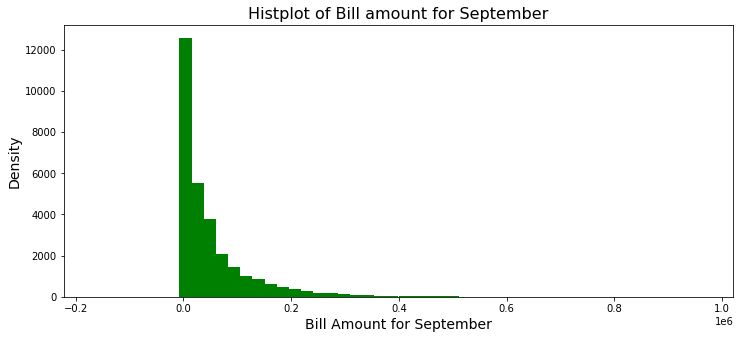

In [33]:
#list of bill amounts available in the dataset
bill_amt = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

#Bill amount for September
plt.figure(figsize=(12,5))
data['BILL_AMT1'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for September', size=16)
plt.xlabel('Bill Amount for September', size=14)
plt.ylabel('Density', size=14)
plt.show()

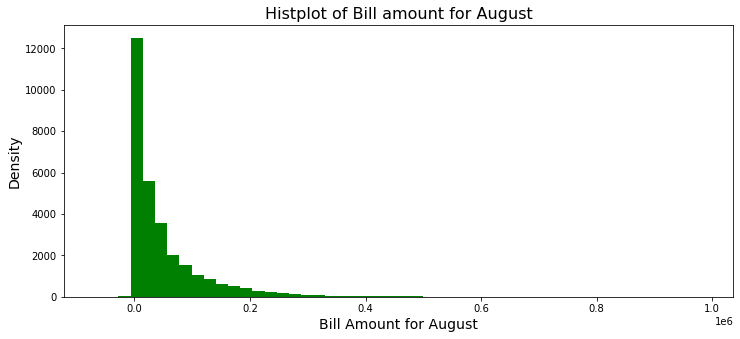

In [34]:
#Bill amount for August
plt.figure(figsize=(12,5))
data['BILL_AMT2'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for August', size=16)
plt.xlabel('Bill Amount for August', size=14)
plt.ylabel('Density', size=14)
plt.show()

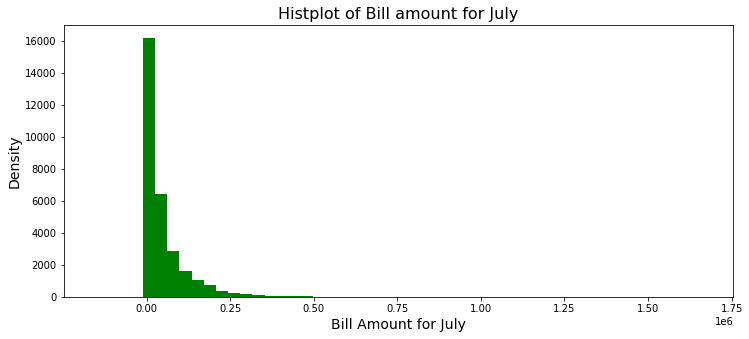

In [35]:
#Bill amount for July
plt.figure(figsize=(12,5))
data['BILL_AMT3'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for July', size=16)
plt.xlabel('Bill Amount for July', size=14)
plt.ylabel('Density', size=14)
plt.show()

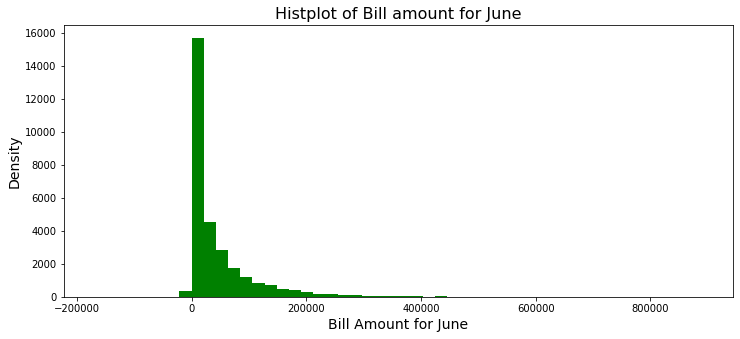

In [36]:
#Bill amount for June
plt.figure(figsize=(12,5))
data['BILL_AMT4'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for June', size=16)
plt.xlabel('Bill Amount for June', size=14)
plt.ylabel('Density', size=14)
plt.show()

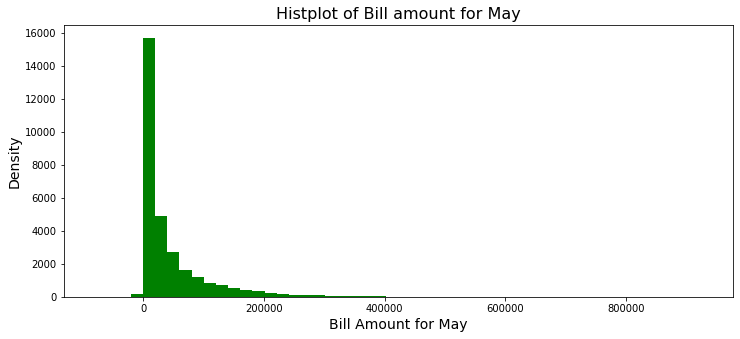

In [37]:
#Bill amount for May
plt.figure(figsize=(12,5))
data['BILL_AMT5'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for May', size=16)
plt.xlabel('Bill Amount for May', size=14)
plt.ylabel('Density', size=14)
plt.show()

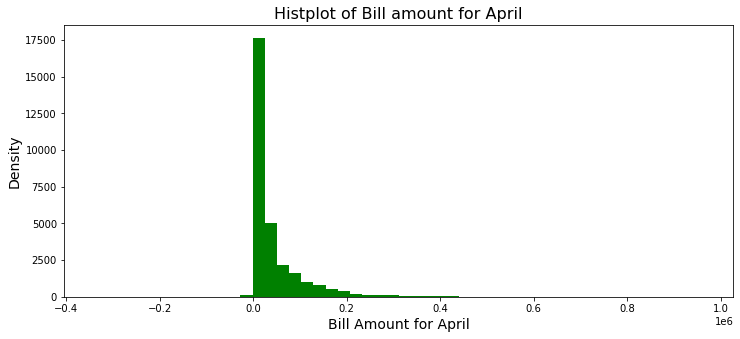

In [38]:
#Bill amount for April
plt.figure(figsize=(12,5))
data['BILL_AMT6'].plot(kind='hist', bins=50, color='g')
plt.title('Histplot of Bill amount for April', size=16)
plt.xlabel('Bill Amount for April', size=14)
plt.ylabel('Density', size=14)
plt.show()

**Visualization of Bill Amount**

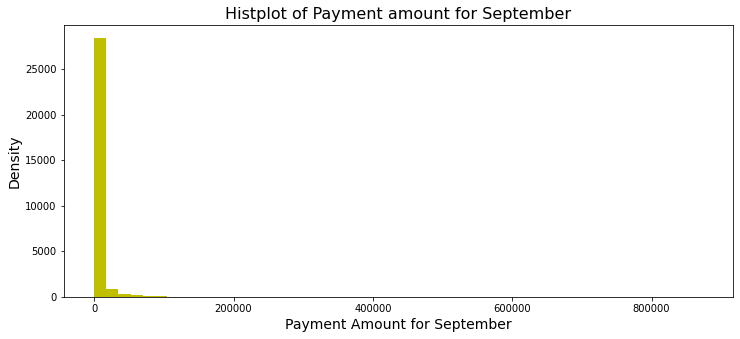

In [39]:
#list of payment amounts available in the dataset
bill_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#Payment amount for September
plt.figure(figsize=(12,5))
data['PAY_AMT1'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for September', size=16)
plt.xlabel('Payment Amount for September', size=14)
plt.ylabel('Density', size=14)
plt.show()

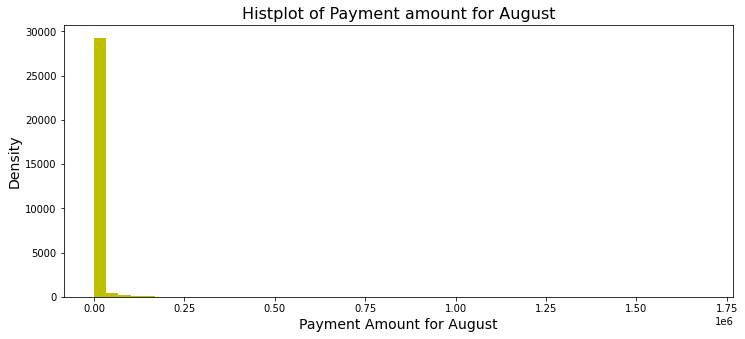

In [40]:
pay_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT2'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for August', size=16)
plt.xlabel('Payment Amount for August', size=14)
plt.ylabel('Density', size=14)
plt.show()

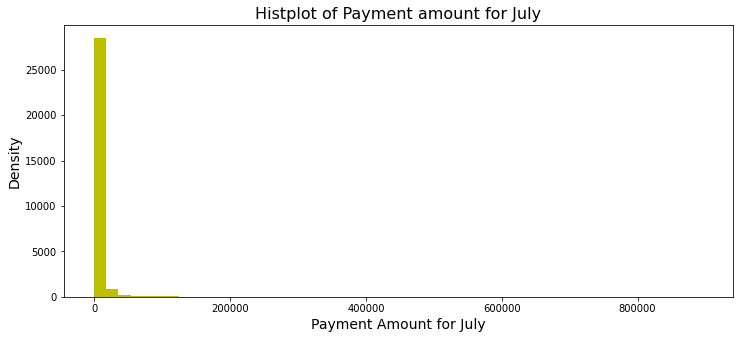

In [41]:
#Payment amount for July
plt.figure(figsize=(12,5))
data['PAY_AMT3'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for July', size=16)
plt.xlabel('Payment Amount for July', size=14)
plt.ylabel('Density', size=14)
plt.show()

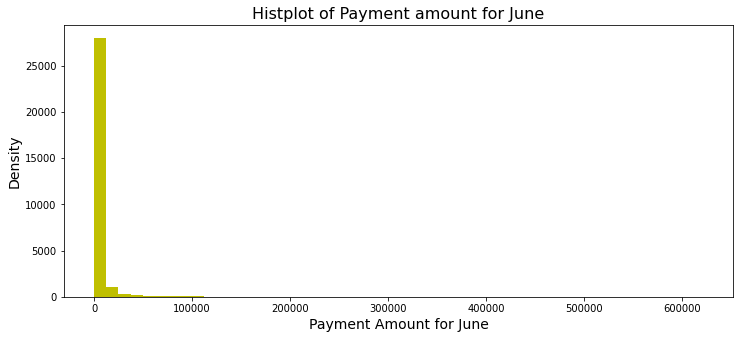

In [42]:
#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT4'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for June', size=16)
plt.xlabel('Payment Amount for June', size=14)
plt.ylabel('Density', size=14)
plt.show()

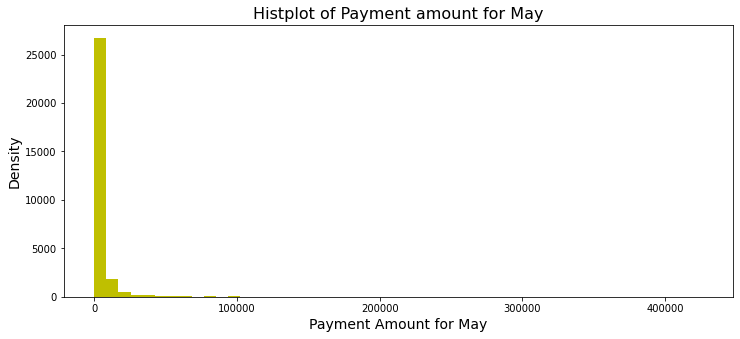

In [43]:
#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT5'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for May', size=16)
plt.xlabel('Payment Amount for May', size=14)
plt.ylabel('Density', size=14)
plt.show()

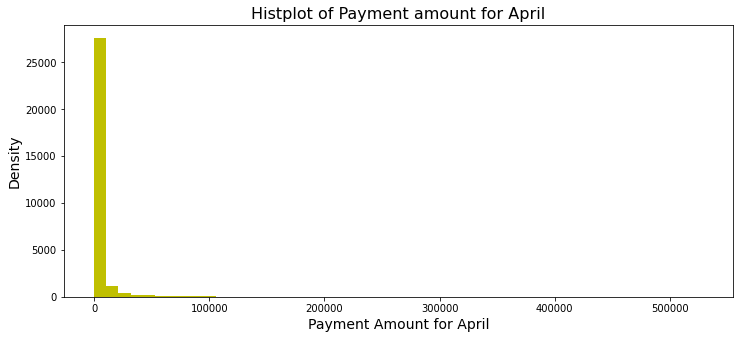

In [44]:
#Payment amount for August
plt.figure(figsize=(12,5))
data['PAY_AMT6'].plot(kind='hist', bins=50, color='y')
plt.title('Histplot of Payment amount for April', size=16)
plt.xlabel('Payment Amount for April', size=14)
plt.ylabel('Density', size=14)
plt.show()

**Conversion of features**

In [45]:
#converting the datatype of the features
features = data.columns

for col in features:
    data[col] = data[col].astype(int)

* All the columns  of  int and float by the datatype is showing as object so, these are converted into numerical features

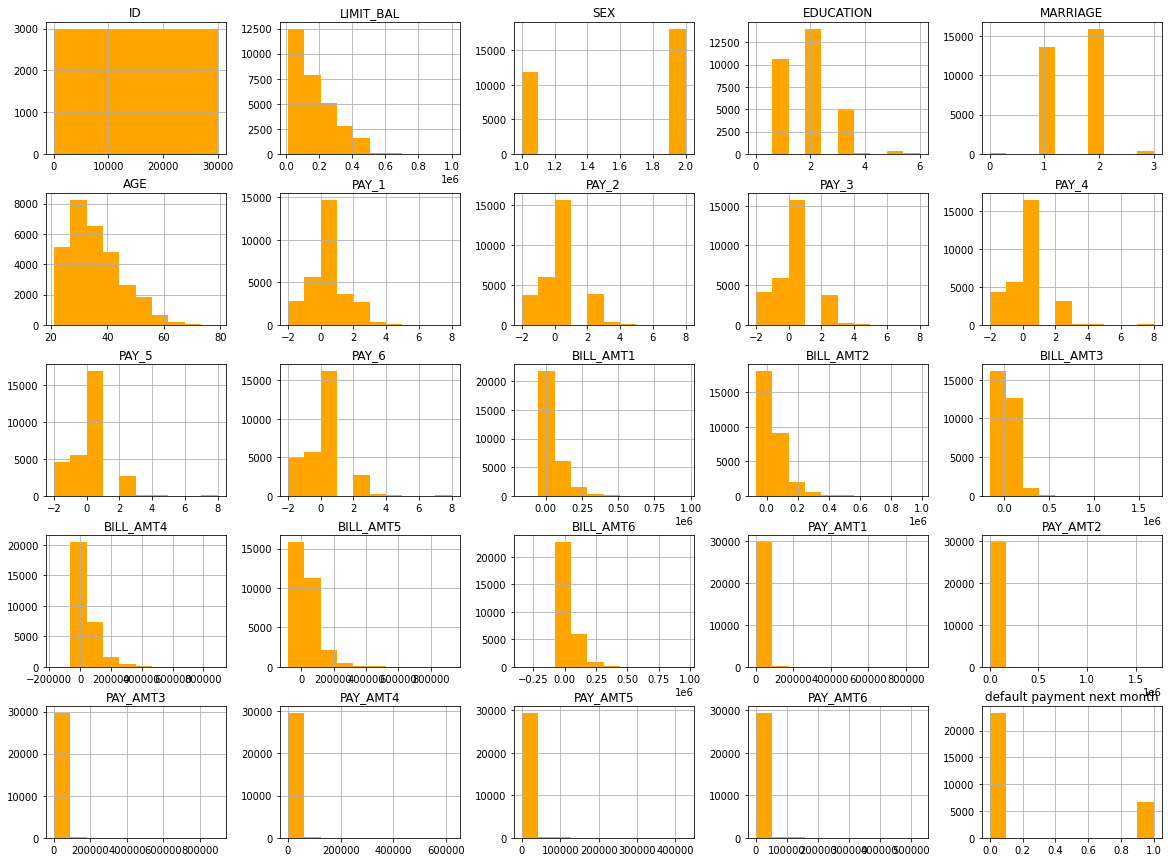

In [46]:
data.hist(figsize=(20,15), color='orange')
plt.show()

In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# **Data Preparation**

**Correlation**

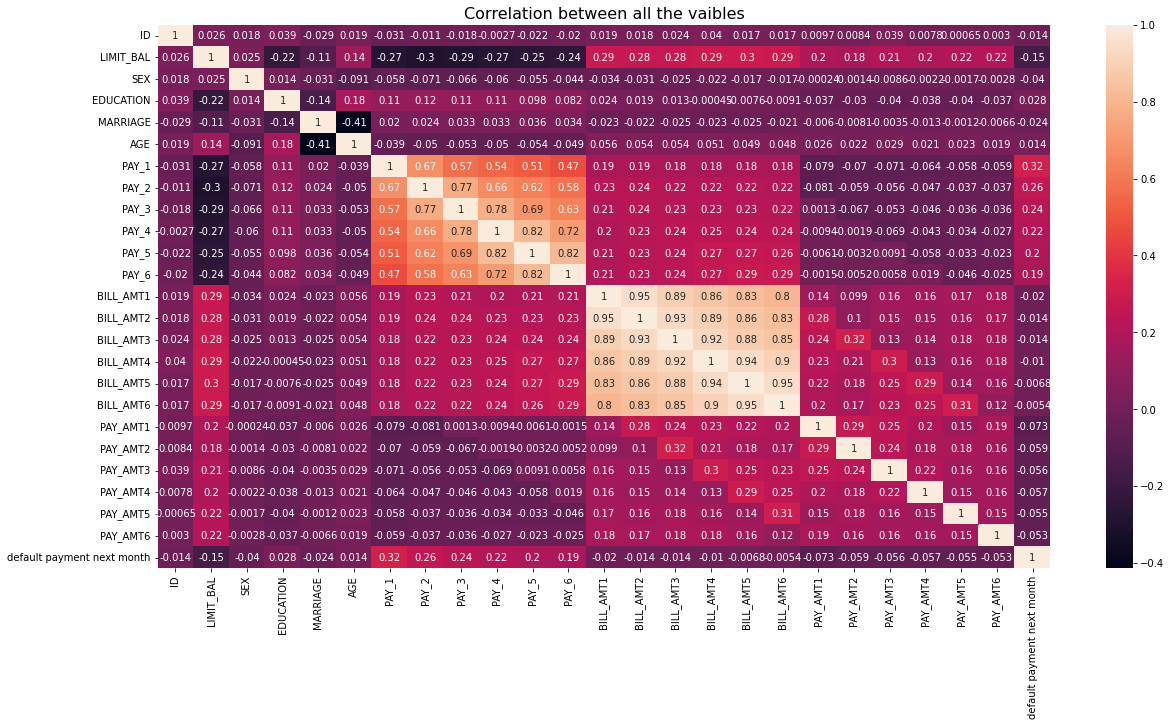

In [48]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Checking for Multicorrelation**

In [49]:
#importing the library required for calculating the variance
from statsmodels.stats.outliers_influence import variance_inflation_factor

#function to calculate the variance inflation factor
def cal_vif(X):
    #dataframe for vif
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [50]:
#dataframe showing the calculated vif
cal_vif(data[[i for i in data.describe().columns if i not in ['ID', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                                              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]])

,Variables,VIF
0,LIMIT_BAL,3.543885
1,SEX,9.088973
2,EDUCATION,6.687151
3,MARRIAGE,6.278864
4,AGE,11.042994
5,PAY_1,1.980413
6,PAY_2,3.162652
7,PAY_3,3.704724
8,PAY_4,4.424868
9,PAY_5,4.959575


All BILL_AMT features have negative correlation among them, they are dropped.

**Dependent and Independent Variables**

In [51]:
#defining the dependent and independent variables
dependent_variable = 'default payment next month'
independent_variables = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 
                         'PAY_6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

**Defining the X and y variables**

In [52]:
#defining the x and y variables
y = data[dependent_variable]
X = data[independent_variables]

# **Model Implementation**

**Libraries required for Model**

In [53]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate 

**Train and Test data sets**

In [54]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (24000, 16)
Size of X_test is: (6000, 16)
Size of y_train is: (24000,)
Size of y_test is: (6000,)


**Scaling the data**

In [56]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [57]:
#Creating the Logistic regression object
regressor = LogisticRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

#defining the predicted variable
pred_test = regressor.predict(X_test)
pred_train = regressor.predict(X_train)

In [58]:
#libraries required for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

**Model Evaluation**

In [59]:
#Accuracy Test
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.8165

**Confusion Matrix**

[[18177   484]
 [ 4138  1201]]


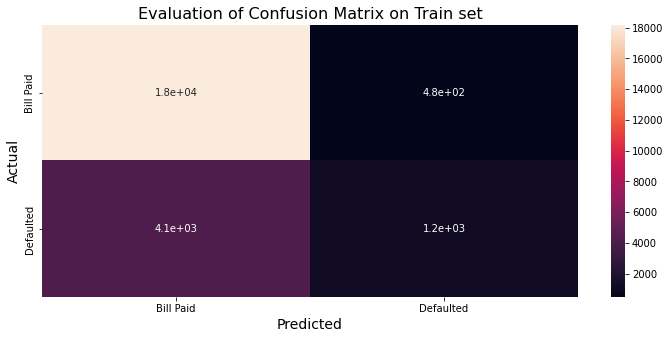

In [60]:
#confusion matrix of train set
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_train, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

**Classification Report**

In [61]:
#classification report of train set
print("Classification Report:")
print('\n')
print(classification_report(y_train, pred_train))

Classification Report:


              precision    recall  f1-score   support

           0       0.81      0.97      0.89     18661
           1       0.71      0.22      0.34      5339

    accuracy                           0.81     24000
   macro avg       0.76      0.60      0.61     24000
weighted avg       0.79      0.81      0.77     24000



[[4610   93]
 [1008  289]]


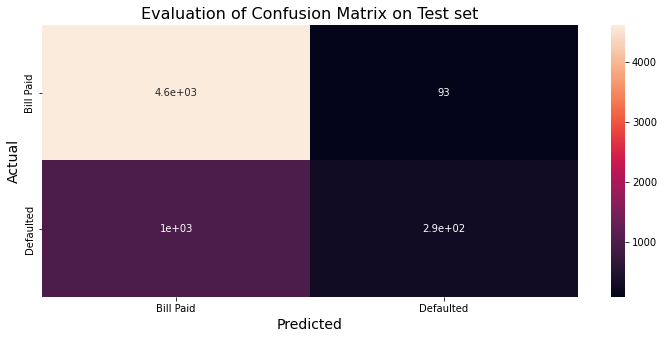

In [62]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [63]:
#classification report of test set
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4703
           1       0.76      0.22      0.34      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.60      0.62      6000
weighted avg       0.81      0.82      0.77      6000



# **Cross Validation on Logistic Regression**

In [64]:
#validating the logistic regression implementation with cross validation
scoring = ['accuracy']
scores = cross_validate(regressor, X_train, y_train, scoring=scoring, cv=5,
                         return_train_score = True, return_estimator = True, verbose=10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.806, test=0.807) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.805, test=0.810) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ................ accuracy: (train=0.808, test=0.807) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.808, test=0.804) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.809, test=0.807) total time=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [65]:
#accuracy of train set
scores['train_accuracy']

array([0.80625   , 0.80489583, 0.80817708, 0.80833333, 0.80885417])

The above are the accuracy scores for all the 5 cross validation train sets.

In [66]:
#accuracy of test set
scores['test_accuracy']

array([0.80708333, 0.81041667, 0.806875  , 0.804375  , 0.80708333])

The above are the accuracy scores for all the 5 cross validation test sets.

# **K Near Neighbor Classifier**

In [67]:
#new dataframe with selected features
df = data[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']]

df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,1
2,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,1
3,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0
4,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,0
5,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,0


In [68]:
#libraries required for knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [69]:
#scalling the data
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-1])

StandardScaler()

In [70]:
scaled_data = scaler.transform(df.drop('default payment next month', axis=1))

In [71]:
#data frame of scaled data
data_feat = pd.DataFrame(scaled_data, columns=df.columns[:-1])
data_feat.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [72]:
#implementing the knn classifier with k = 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
#defining the predicted variable
pred_test = knn.predict(X_test)

In [74]:
#classification report of test set
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4703
           1       0.39      0.41      0.40      1297

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.74      6000



**Finding the best K value**

In [75]:
#list of accuracy rate in knn
accuracy_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, df['default payment next month'], cv=10)
    accuracy_rate.append(score.mean())

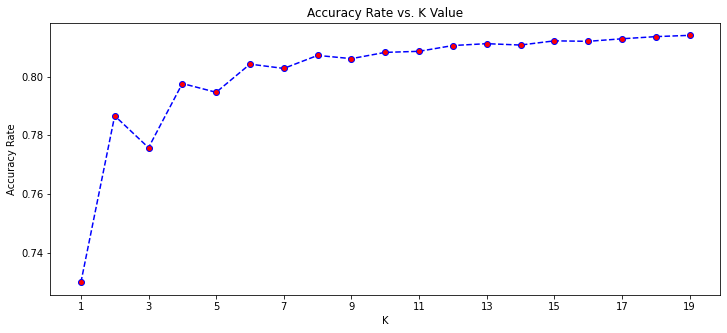

In [76]:
#plotting the values of accurary rate
plt.figure(figsize=(12,5))
plt.plot(range(1, 20), accuracy_rate, 'b--', marker='o', markerfacecolor='red')
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(1, 20, 2))
plt.ylabel('Accuracy Rate')
plt.show()

k at 15 is considered as the best value, as it have the good accuracy rate

In [77]:
#lisst of error rate
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, df['default payment next month'], cv=10)
    error_rate.append(1-(score.mean()))

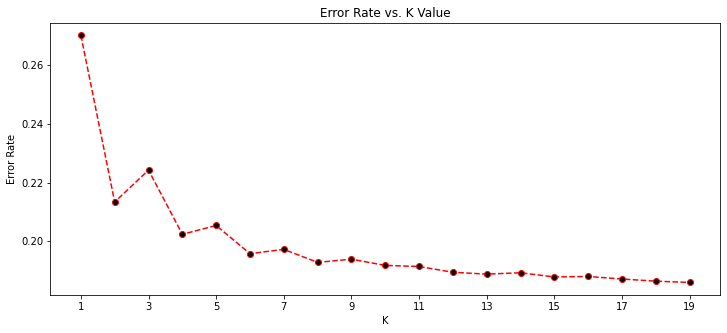

In [78]:
#plotting the list of error rate
plt.figure(figsize=(12,5))
plt.plot(range(1, 20), error_rate, 'r--', marker = 'o', markerfacecolor='k')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(1, 20, 2))
plt.ylabel('Error Rate')
plt.show()

k at 15 shows the low rate of error, even though it goes down after that when we compare it with the accuracy at same point that's better to consider the k value at 15

In [79]:
#impleting the knn classifier with k = 15
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [80]:
#defining the predicted variable
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)

**Model Evaluation**

In [81]:
#classification report of train set
print("Classification Report:")
print('\n')
print(classification_report(y_train, pred_train))

Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18661
           1       0.69      0.38      0.49      5339

    accuracy                           0.82     24000
   macro avg       0.77      0.67      0.69     24000
weighted avg       0.81      0.82      0.80     24000



In [82]:
#classification report of testset
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4703
           1       0.62      0.35      0.45      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



[[17734   927]
 [ 3288  2051]]


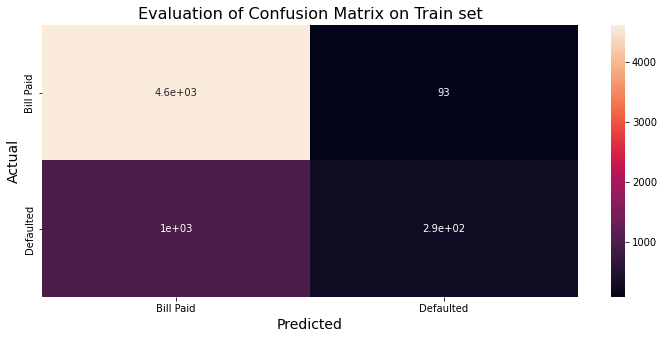

In [83]:
#confusion matrix of train set
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[4428  275]
 [ 839  458]]


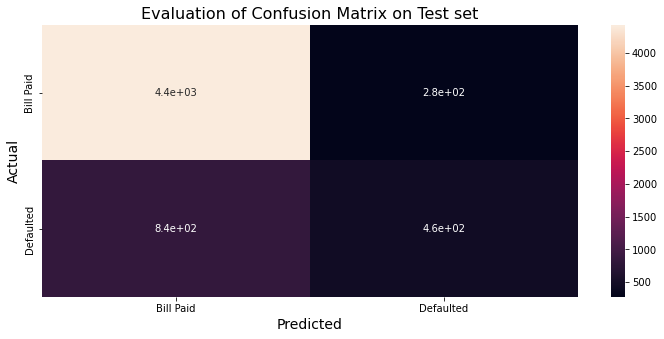

In [84]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# **Naive Bayes Classifier**

In [85]:
#library required for the implementation of naive bayes
from sklearn.naive_bayes import GaussianNB

#implementing the naive bayes classifier
default_prediction = GaussianNB()
default_prediction.fit(X_train, y_train)

GaussianNB()

In [86]:
#defining the predicted variables
pred_train = default_prediction.predict(X_train)
pred_test = default_prediction.predict(X_test)

**Model Evaluation**

In [87]:
#claculating the accuracy of the model
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.718

In [88]:
#classification report of test set
print("Classification Report:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report:


              precision    recall  f1-score   support

           0       0.88      0.74      0.80      4703
           1       0.40      0.64      0.49      1297

    accuracy                           0.72      6000
   macro avg       0.64      0.69      0.65      6000
weighted avg       0.78      0.72      0.74      6000



[[13889  4772]
 [ 1874  3465]]


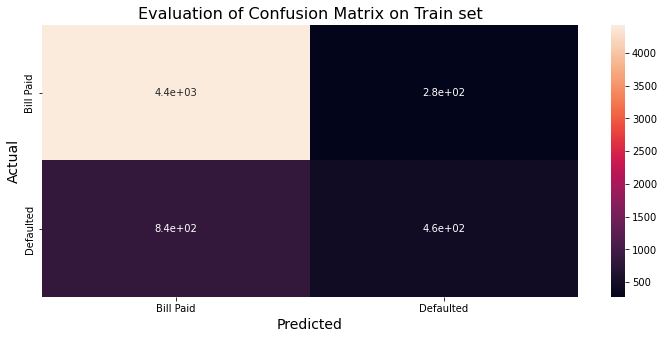

In [89]:
#confusion matrix of train set
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[3479 1224]
 [ 468  829]]


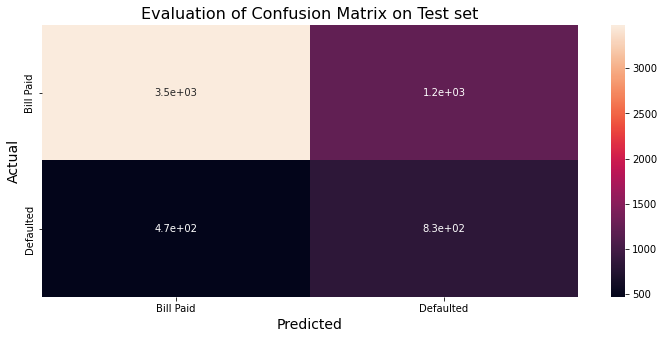

In [90]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# **Random Forest Classifier**

In [91]:
#library required for the random forest
from sklearn.ensemble import RandomForestClassifier

#implementing the random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
#defining the predicted variables
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

**Model Evaluation**

In [93]:
#classification report of train set
print("Classification Report on training data:")
print('\n')
print(classification_report(y_train, pred_train))

Classification Report on training data:


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18661
           1       0.99      0.98      0.99      5339

    accuracy                           0.99     24000
   macro avg       0.99      0.99      0.99     24000
weighted avg       0.99      0.99      0.99     24000



In [94]:
#classification report of test set
print("Classification Report on test data:")
print('\n')
print(classification_report(y_test, pred_test))

Classification Report on test data:


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4703
           1       0.65      0.38      0.48      1297

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



[[18628    33]
 [  104  5235]]


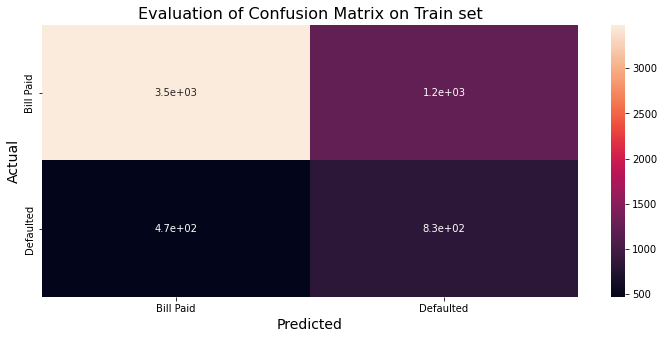

In [95]:
#confusion matrix of train set
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Train set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[4438  265]
 [ 809  488]]


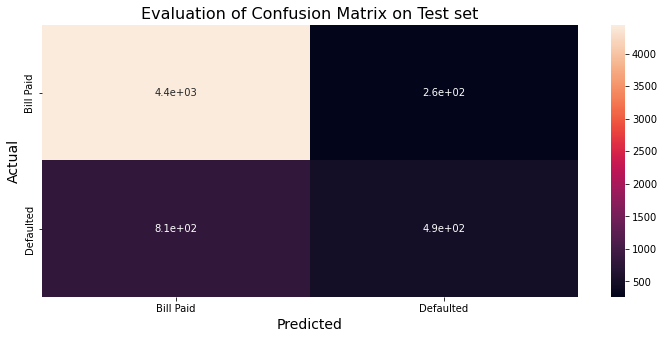

In [96]:
#confusion matrix of test set
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)

labels = ['Bill Paid', 'Defaulted']
plt.figure(figsize=(12,5))
ax = plt.subplot()
#plotting the confusion matrix
sns.heatmap(cm_test, annot=True, ax=ax)
plt.title('Evaluation of Confusion Matrix on Test set', size=16)
plt.xlabel('Predicted', size=14)
plt.ylabel('Actual', size=14)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

**Conclusion**
* 500000 is the highest limit balance and 327680 is the least one.
* We have more number of defaulters from female customers.
* In both married and singles the defaulters are equal in number.
* Coming to education, the university category customers are high in number as well as in
defaulting.
* We have customers from 21 to 79 age group. Customers of 29 age are more in number but
there is no much difference in the age criterion in defaulting.
* Some of the bill amount histplot are extended towards the left it is assumed that there are
some advance payments.

The models accuracy of predicting the customer will pay the next month credit card due or not on the test data.

Logistic Regression have the accuracy of 81.65%.

K Near Neighbor have the accuracy of 81.00%.

Naive Bayes have the accuracy of 72.00%

Random Forest have the accuracy of 82.00%

 
From the above evaluation it is better to train the model with Random Forest Classifier which have 82.00% of accuracy on test data.